In [1]:
import cv2

img = cv2.imread('../photo/original.JPG')
print(img.shape)
im_resized = cv2.resize(img, dsize=None, fx=0.3, fy=0.3)
print(im_resized.shape)
cv2.imwrite('../photo/opencv_0.3.jpg', im_resized, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

(1232, 1840, 3)
(370, 552, 3)


True

In [2]:
im_resized = cv2.resize(img, dsize=None, fx=1.3, fy=1.3)
print(im_resized.shape)
cv2.imwrite('../photo/opencv_1.3.jpg', im_resized, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

(1602, 2392, 3)


True

In [3]:
#高さを定義
height = img.shape[0]                         
#幅を定義
width = img.shape[1]  
#回転の中心を指定                          
center = (int(width/2), int(height/2))
#回転角を指定
angle = 45.0
#スケールを指定
scale = 1.0
#getRotationMatrix2D関数を使用
trans = cv2.getRotationMatrix2D(center, angle , scale)
#アフィン変換
image2 = cv2.warpAffine(img, trans, (width,height))
print(image2.shape)
cv2.imwrite('../photo/opencv_rotation.jpg', image2, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

(1232, 1840, 3)


True

In [4]:
print(img.flatten())

[208 174 144 ... 122 104  87]


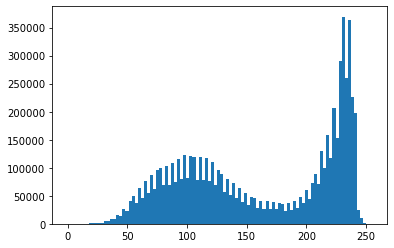

In [5]:
import matplotlib.pyplot as plt
plt.hist(img.flatten(), 100)
plt.show()

In [6]:
img2=cv2.imread('../photo/original1.JPG')

In [11]:
# ２値化
def binarization(img):
    a,img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return img


In [19]:
# 差分を数値化
def getDiff(img1, img2):
    # グレースケール変換
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    # 差分取得
    mask = cv2.absdiff(img1, img2)
    # ２値化
    bi = binarization(mask)
    return bi # 白の要素数

In [13]:
gray1,gray2,binari=getDiff(img,img2)
cv2.imwrite('../photo/opencv_gray1.jpg', gray1, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
cv2.imwrite('../photo/opencv_gray2.jpg', gray2, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
cv2.imwrite('../photo/opencv_binari.jpg', binari,[int(cv2.IMWRITE_JPEG_QUALITY), 100])

True

In [20]:
mask=getDiff(img,img2)
print(mask)
cv2.imwrite('../photo/opencv_difference.jpg', mask,[int(cv2.IMWRITE_JPEG_QUALITY), 100])

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


True